In [1]:
!pip install signate

from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth


auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'signate.json'", fields="files(id)").execute()
signate_api_key = results.get('files', [])

filename = "/root/.signate/signate.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=signate_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

     |████████████████████████████████| 138 kB 9.1 MB/s 
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=ed4f535925b73347c8429eb30d307e5c259de883b8f32ce249384d4d05322a3f
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.7 which is incompatible.
google-colab 1.0.0 requires six~=1.15.0, but you have six 1.16.0 which is i

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


Download 100%.


In [2]:
! signate list
! signate files --competition-id=520
! signate download --competition-id=520

  competitionId  title                                                                                      closing     prize                  submitters
---------------  -----------------------------------------------------------------------------------------  ----------  -------------------  ------------
              1  【練習問題】銀行の顧客ターゲティング                                                       -                                        5313
             24  【練習問題】お弁当の需要予測                                                               -                                        6563
             27  【練習問題】Jリーグの観客動員数予測                                                        -                                        1500
            100  【練習問題】手書き文字認識                                                                 -           Knowledge                     199
            102  【練習問題】タイタニックの生存予測                                                         -           Knowledge                    1201
 

In [3]:
! unzip train.zip
! unzip train/train_annotations.zip 
! unzip train/train_images.zip
! unzip test.zip
! unzip test/test_images.zip
! unzip sample_submission.zip

Archive:  train.zip
   creating: train/
  inflating: train/train.csv         
  inflating: train/train_annotations.zip  
 extracting: train/train_images.zip  
Archive:  train/train_annotations.zip
   creating: train_annotations/
  inflating: train_annotations/train_63_04.png  
  inflating: train_annotations/train_63_10.png  
  inflating: train_annotations/train_63_11.png  
  inflating: train_annotations/train_63_05.png  
  inflating: train_annotations/train_63_07.png  
  inflating: train_annotations/train_63_06.png  
  inflating: train_annotations/train_63_02.png  
  inflating: train_annotations/train_63_03.png  
  inflating: train_annotations/train_63_01.png  
  inflating: train_annotations/train_63_00.png  
  inflating: train_annotations/train_31_05.png  
  inflating: train_annotations/train_31_04.png  
  inflating: train_annotations/train_31_03.png  
  inflating: train_annotations/train_31_02.png  
  inflating: train_annotations/train_31_00.png  
  inflating: train_annotations/train

In [4]:
! ls

adc.json				       test
PBL05_h_exercise4_question.pdf		       test_images
PBL05_i_exercise4_supplementary-documents.pdf  test.zip
README.md				       train
sample_data				       train_annotations
sample_submission			       train_images
sample_submission.zip			       train.zip


In [5]:
# Googleドライブのマウント
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


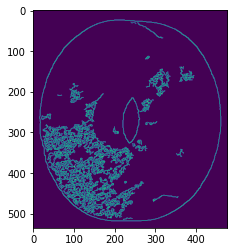

In [7]:
# ライブラリのインポート
from skimage import io
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# 画像の読み込み
image = io.imread('./train_images/train_31_00.png')

# Cannyエッジ法
class CannyEdge():
    def __call__(self, image):
        th1, th2 = 20, 110
        img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        img_edges = cv2.Canny(img_gray, th1, th2)
        _,th = cv2.threshold(img_edges,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        return th
        
canny = CannyEdge()

image_canny = canny(image)

plt.imshow(image_canny)
plt.show()